<a href="https://colab.research.google.com/github/aimclee/2021-seoul-metro-guest-analysis/blob/main/2021%EB%85%84_%EC%84%9C%EC%9A%B8%EC%8B%9C_%EC%97%AD%EB%B3%84_%EC%8A%B9%ED%95%98%EC%B0%A8%EC%9D%B8%EC%9B%90_%EB%B6%84%EC%84%9D(%EC%9D%B4%EB%AF%BC%EC%B2%A0).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 2. Data Understanding : 분석을 위한 데이터를 수집하고 데이터 속성을 이해

In [ ]:
# 구글 드라이브에서 바로 데이터 불러오기 - 속도가 훨씬 빠름
# 데이터 수집
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive')

df = pd.read_csv('/content/gdrive/My Drive/data_analysis/data/seoul-metro-time-population-data/서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv',encoding='cp949')
df

# 파일 업로드 방식으로 데이터 불러오기 - 속도 느림
# from google.colab import files
# myfile = files.upload()

# import io
# import pandas as pd
# df = pd.read_csv(io.BytesIO(myfile['서울시 지하철 호선별 역별 시간대별 승하차 인원 정보.csv']),encoding='cp949')
# df

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
0,202112,1호선,동대문,803,15,12276,1913,8716,5492,13464,10014,18832,21879,16495,20889,14912,18816,16411,20372,19114,20473,20830,20188,23345,20221,24025,18935,24577,17681,24426,17084,21648,17667,14558,17404,12493,11780,11616,11104,7600,8620,2617,7679,24,1355,0,0,0,0,0,0,20220103
1,202112,1호선,동묘앞,116,0,2423,756,3270,3915,5412,7362,8890,18151,7427,14958,7697,16182,11396,21689,16817,24866,22871,27413,27745,27233,31397,22238,29900,15386,24201,10434,15857,8412,7128,6011,4797,4448,4328,4922,2608,3963,980,2491,10,1437,1,1,0,1,0,0,20220103
2,202112,1호선,서울역,769,16,8460,6094,11185,35735,34375,85455,55770,188733,43790,121596,44195,62290,52865,52223,63018,60591,64741,60427,57303,55157,75713,59298,85760,60717,129054,71864,184200,77500,87213,50899,62761,33524,70343,32014,38334,18709,12519,8703,61,841,0,2,0,0,0,0,20220103
3,202112,1호선,시청,37,2,1902,4537,2827,19095,6322,56046,7816,168744,8475,78172,10058,32091,15981,29806,17428,27421,20577,26735,26865,21996,34727,19517,41288,19300,71334,20574,136819,20216,50959,9584,44297,5619,45585,5417,21428,2794,5284,1713,28,153,0,1,0,0,0,0,20220103
4,202112,1호선,신설동,383,6,7270,2738,7731,10318,15891,21124,24588,58444,16025,32087,14137,20784,16604,17520,18380,17529,20266,18041,20668,16573,22767,17617,30233,17970,39687,20597,54451,24853,19057,17181,13301,11550,11994,12367,6876,8680,2280,5913,37,863,0,0,0,0,0,0,20220103
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48981,201501,중앙선,운길산,0,0,177,56,642,403,1292,675,1479,1390,1438,3270,1408,3673,1179,3090,1268,1780,2081,2147,3065,1559,4009,1355,3782,1432,3571,1300,2304,1218,1332,1457,1002,769,942,760,270,775,111,633,3,222,0,0,0,0,0,0,20151223
48982,201501,중앙선,원덕,1,0,292,4,415,46,537,248,823,344,980,273,1025,497,720,504,571,537,684,390,537,513,650,683,557,731,481,735,563,721,175,714,156,612,53,404,71,339,8,383,3,157,0,0,0,0,0,0,20151223
48983,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,3027,25792,6573,14328,6133,11117,5605,10340,5192,10853,6016,10510,7633,9260,8331,8473,10252,8259,12166,8279,13786,8399,19547,6449,21424,4652,14362,3849,11678,3062,11060,1619,6501,86,1617,0,0,0,0,0,0,20151223
48984,201501,중앙선,팔당,0,0,161,50,368,149,1227,523,910,1151,897,2931,1009,3932,904,2199,1086,1333,1371,897,1944,929,2514,996,2357,960,2260,979,1617,822,845,749,492,320,420,319,309,339,107,336,8,85,0,0,0,0,0,0,20151223


In [ ]:
test1 = df[(df['지하철역']=='이수')]
test1

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원,작업일자
253,202112,7호선,이수,16,1,4272,939,8322,7946,24230,14263,41032,41386,26163,27152,17670,18698,17645,17831,19952,18205,21744,20053,21807,20363,23272,22866,26861,26844,31728,34973,42169,53372,23807,32865,23107,17282,28184,17620,16985,11906,6375,6671,24,609,0,0,0,0,0,0,20220103
862,202111,7호선,이수,21,0,4348,878,8794,8477,25533,14352,42778,41035,26633,27614,18414,18926,17579,17324,19490,18155,21718,19543,21708,20024,22739,22456,25664,26184,31148,35282,42001,54938,23905,34552,21263,18340,23565,15330,21139,13845,8887,8847,30,913,0,0,0,0,0,0,20211203
1471,202110,7호선,이수,41,0,4357,843,8294,8523,23495,13376,36565,36970,24661,26263,17872,19499,17825,18018,19677,18951,22074,20799,21913,20643,23424,22352,25741,25727,30211,32293,38729,46684,22870,30343,21028,16497,23623,14426,22105,14961,3324,6308,7,427,0,0,0,0,0,0,20211103
2080,202109,7호선,이수,36,0,3789,783,7827,8045,22473,12382,33314,34321,22371,24278,15770,17142,16453,16215,17602,16386,18928,18492,19217,18297,20576,19640,22927,23393,26919,28593,36191,41571,21151,27989,19071,15063,20888,13340,15423,11873,2711,5200,46,562,0,0,0,0,0,0,20211003
2687,202108,7호선,이수,46,0,4202,796,7814,8627,21824,13257,34193,36898,22814,25611,15999,17601,16189,15999,17402,16324,18315,18471,18390,18012,19789,18924,21997,21984,27562,27220,38852,41873,21486,28970,19822,15315,20288,13199,13138,10615,2372,4534,54,603,0,0,0,0,0,0,20210903
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46468,201505,7호선,이수,19,0,6080,1185,12107,9345,31381,17445,49410,46230,32639,34220,25251,23674,24550,21458,26556,23411,28991,25132,27929,25406,28624,27841,28496,30664,31059,36551,43001,52376,30963,48958,29711,30780,30834,27722,30308,25481,16827,16779,2641,5072,0,56,0,0,0,0,20151223
47024,201504,7호선,이수,21,0,5503,1130,12412,9155,35431,19616,55117,52826,33856,35795,24738,23192,24119,21540,24777,21739,28072,24104,27448,23987,27502,26301,27939,29653,30445,35935,45956,54972,32899,52779,29034,31195,31870,28086,30550,25833,16842,16374,3038,5365,1,84,0,0,0,0,20151223
47578,201503,7호선,이수,14,0,5619,1102,11874,9129,35739,19050,55912,52818,34854,35815,24772,24224,25122,22550,26015,22847,29384,24433,28162,25330,29006,27433,29393,31672,32041,38709,46774,57938,34262,55413,30912,32215,33654,28875,31541,26321,16483,16133,2820,4868,0,120,0,0,0,0,20151223
48132,201502,7호선,이수,25,0,4248,937,9135,7535,24816,13165,40951,40307,26550,28536,19702,20278,20322,18727,21758,19907,25171,21937,24787,22895,25376,24359,26238,26566,28019,31018,38674,46090,27705,43082,25319,26289,26652,22707,25497,20341,14061,13022,2354,3947,35,128,0,5,0,0,20151223


In [ ]:
# 전체 데이터의 구조 파악
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48986 entries, 0 to 48985
Data columns (total 52 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   사용월           48986 non-null  int64 
 1   호선명           48986 non-null  object
 2   지하철역          48986 non-null  object
 3   04시-05시 승차인원  48986 non-null  int64 
 4   04시-05시 하차인원  48986 non-null  int64 
 5   05시-06시 승차인원  48986 non-null  int64 
 6   05시-06시 하차인원  48986 non-null  int64 
 7   06시-07시 승차인원  48986 non-null  int64 
 8   06시-07시 하차인원  48986 non-null  int64 
 9   07시-08시 승차인원  48986 non-null  int64 
 10  07시-08시 하차인원  48986 non-null  int64 
 11  08시-09시 승차인원  48986 non-null  int64 
 12  08시-09시 하차인원  48986 non-null  int64 
 13  09시-10시 승차인원  48986 non-null  int64 
 14  09시-10시 하차인원  48986 non-null  int64 
 15  10시-11시 승차인원  48986 non-null  int64 
 16  10시-11시 하차인원  48986 non-null  int64 
 17  11시-12시 승차인원  48986 non-null  int64 
 18  11시-12시 하차인원  48986 non-null  int64 
 19  12시-

# 3. Data Preparation : 데이터 전처리를 통해 분석용 데이터셋 확보

In [ ]:
# 1. 작업일자 column은 따로 쓰일 일이 없으니 제거
df.drop('작업일자', inplace=True, axis=1)
df

,사용월,호선명,지하철역,04시-05시 승차인원,04시-05시 하차인원,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원,01시-02시 승차인원,01시-02시 하차인원,02시-03시 승차인원,02시-03시 하차인원,03시-04시 승차인원,03시-04시 하차인원
0,202112,1호선,동대문,803,15,12276,1913,8716,5492,13464,10014,18832,21879,16495,20889,14912,18816,16411,20372,19114,20473,20830,20188,23345,20221,24025,18935,24577,17681,24426,17084,21648,17667,14558,17404,12493,11780,11616,11104,7600,8620,2617,7679,24,1355,0,0,0,0,0,0
1,202112,1호선,동묘앞,116,0,2423,756,3270,3915,5412,7362,8890,18151,7427,14958,7697,16182,11396,21689,16817,24866,22871,27413,27745,27233,31397,22238,29900,15386,24201,10434,15857,8412,7128,6011,4797,4448,4328,4922,2608,3963,980,2491,10,1437,1,1,0,1,0,0
2,202112,1호선,서울역,769,16,8460,6094,11185,35735,34375,85455,55770,188733,43790,121596,44195,62290,52865,52223,63018,60591,64741,60427,57303,55157,75713,59298,85760,60717,129054,71864,184200,77500,87213,50899,62761,33524,70343,32014,38334,18709,12519,8703,61,841,0,2,0,0,0,0
3,202112,1호선,시청,37,2,1902,4537,2827,19095,6322,56046,7816,168744,8475,78172,10058,32091,15981,29806,17428,27421,20577,26735,26865,21996,34727,19517,41288,19300,71334,20574,136819,20216,50959,9584,44297,5619,45585,5417,21428,2794,5284,1713,28,153,0,1,0,0,0,0
4,202112,1호선,신설동,383,6,7270,2738,7731,10318,15891,21124,24588,58444,16025,32087,14137,20784,16604,17520,18380,17529,20266,18041,20668,16573,22767,17617,30233,17970,39687,20597,54451,24853,19057,17181,13301,11550,11994,12367,6876,8680,2280,5913,37,863,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48981,201501,중앙선,운길산,0,0,177,56,642,403,1292,675,1479,1390,1438,3270,1408,3673,1179,3090,1268,1780,2081,2147,3065,1559,4009,1355,3782,1432,3571,1300,2304,1218,1332,1457,1002,769,942,760,270,775,111,633,3,222,0,0,0,0,0,0
48982,201501,중앙선,원덕,1,0,292,4,415,46,537,248,823,344,980,273,1025,497,720,504,571,537,684,390,537,513,650,683,557,731,481,735,563,721,175,714,156,612,53,404,71,339,8,383,3,157,0,0,0,0,0,0
48983,201501,중앙선,중랑,14,1,4929,424,8539,2084,22160,3027,25792,6573,14328,6133,11117,5605,10340,5192,10853,6016,10510,7633,9260,8331,8473,10252,8259,12166,8279,13786,8399,19547,6449,21424,4652,14362,3849,11678,3062,11060,1619,6501,86,1617,0,0,0,0,0,0
48984,201501,중앙선,팔당,0,0,161,50,368,149,1227,523,910,1151,897,2931,1009,3932,904,2199,1086,1333,1371,897,1944,929,2514,996,2357,960,2260,979,1617,822,845,749,492,320,420,319,309,339,107,336,8,85,0,0,0,0,0,0


In [ ]:
# 2. 실제 이동 경로에 해당되는 역만 추출
  
station = ['상일동','고덕','명일','굽은다리(강동구민회관앞)','길동','강동','천호(풍납토성)','광나루(장신대)','아차산(어린이대공원후문)','군자(능동)',
           '어린이대공원(세종대)','건대입구','뚝섬유원지','청담','강남구청','학동','논현','반포','고속터미널','내방','이수','남성','숭실대입구(살피재)']
df_station = df[df['지하철역'].isin(station)]

# 단, 2개 이상 호선이 겹치는 역의 경우, 실제 이동경로가 아닌 호선의 경우 제거해야한다.

cheonho = df_station[(df_station['지하철역']=='천호(풍납토성)')&(df_station['호선명']=='8호선')].index
df_station = df_station.drop(cheonho)

konkuk = df_station[(df_station['지하철역']=='건대입구')&(df_station['호선명']=='2호선')].index
df_station=df_station.drop(konkuk)

gang_nam_gu_office = df_station[(df_station['지하철역']=='강남구청')&(df_station['호선명']=='분당선')].index
df_station=df_station.drop(gang_nam_gu_office)

express_bus_terminal_3 = df_station[(df_station['지하철역']=='고속터미널')&(df_station['호선명']=='3호선')].index
df_station = df_station.drop(express_bus_terminal_3)

express_bus_terminal_9 = df_station[(df_station['지하철역']=='고속터미널')&(df_station['호선명']=='9호선')].index
df_station = df_station.drop(express_bus_terminal_9)

df_station

# 현재 dataFrame을 엑셀파일로 변환
df_station.to_excel("path-station.xlsx")

In [ ]:
# 3. 이상치 처리 (실제 승객이 이용하는 시간대만을 따진다.)
outlier = ['04시-05시 승차인원', '04시-05시 하차인원', 
           '01시-02시 승차인원','01시-02시 하차인원',
           '02시-03시 승차인원','02시-03시 하차인원',
           '03시-04시 승차인원','03시-04시 하차인원'
           ]
df_station.drop(columns=outlier, inplace=True, axis=1)
df_station


,사용월,호선명,지하철역,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원
120,202112,5호선,강동,9998,1352,18879,10755,52202,26694,69239,48724,34807,25850,23389,18251,22519,15799,23807,17662,22886,20545,22907,20520,24537,23959,28292,25289,42202,35041,43785,52632,19464,41302,14307,25089,12290,27173,7627,21615,2285,11859,23,1416
125,202112,5호선,고덕,3536,1519,9987,5441,28981,13775,24747,18511,14818,11324,13603,10666,13963,8743,14225,12120,13192,13273,14196,12772,16082,15253,20535,15616,20961,19642,15988,27148,8647,25359,7027,12703,7162,12330,6036,10987,1518,4718,6,686
127,202112,5호선,광나루(장신대),4811,1670,14155,7156,37625,14384,44368,29820,24691,18143,17699,15725,16426,14117,18248,15356,19186,14730,19394,15547,20040,16472,23053,20832,24757,26181,28316,39098,14463,25776,9519,16773,10888,19192,7524,13658,2130,6533,13,227
129,202112,5호선,군자(능동),6506,831,11210,4819,32048,7250,46480,25816,21104,16238,12751,10753,11975,10289,13467,12450,13725,13376,12920,14240,13545,16961,15505,20696,20054,30983,24750,51816,13767,32752,12140,18951,13641,20627,7833,15832,3161,9663,2,2670
130,202112,5호선,굽은다리(강동구민회관앞),6380,558,13142,2782,33872,6064,38975,14843,19523,10446,14718,7858,13595,9014,14371,9994,13474,10768,12858,12420,12619,14978,13616,16995,14894,22090,15241,35663,8206,26473,6835,15766,7084,17130,4266,13029,1051,6214,22,971
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
48660,201501,7호선,뚝섬유원지,4954,533,9209,3885,24253,5288,35570,14172,24103,8767,12365,8707,11252,9712,11311,10677,12955,11911,12502,12135,12303,12825,14076,13129,15955,15796,13150,24458,9412,23120,7169,14894,6202,15530,4785,16224,2378,9350,408,2709
48664,201501,7호선,반포,1071,580,3680,5195,8501,11663,14507,22470,10284,20147,7352,10152,7499,9903,8158,11845,9093,11167,9668,9170,12403,8748,12609,8872,15941,10106,20184,13032,15259,10640,12062,6573,11258,5622,12640,5689,4247,3397,501,947
48682,201501,7호선,이수,5101,1085,11270,8845,28596,15245,49405,48823,31112,34923,22945,23634,23186,22319,25259,23705,29227,25673,28383,26739,29658,28175,30300,30770,33965,36522,47924,55220,32351,51901,30172,30185,31505,25497,30169,23160,16359,14736,2922,4575
48690,201501,7호선,청담,5111,3613,10781,23922,18329,68074,23659,199043,19939,131513,18131,48252,21535,34994,25985,30496,28589,32637,30964,31246,39028,27979,43270,27970,57918,30584,121370,35588,99193,29936,55703,18554,51536,17434,40847,15328,14050,11252,1687,5085


In [ ]:
#4 2020년 1월부터 2021년 12월까지 2년치의 데이터만 추출
date=[i for i in range(202001,202012+1)] + [i for i in range(202101,202112+1)]
df_station = df_station[df_station['사용월'].isin(date)]

# 사용월을 오름차순으로 정렬
df_station.sort_values('사용월', ascending=True, inplace=True)
df_station

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,사용월,호선명,지하철역,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원
14146,202001,7호선,학동,3229,1886,5528,20067,9117,44613,12734,188060,11464,137770,11225,45962,14391,28225,18325,23614,20567,26491,25879,22971,33465,19454,38852,19424,58167,20232,158490,21868,79573,15009,39605,9904,36961,8042,27546,6400,11348,5279,1815,1971
14006,202001,5호선,강동,11238,1121,20525,11657,60239,24271,79515,40206,43140,25992,30795,19116,29199,18311,30761,19471,29694,23454,27428,25281,29121,27511,31706,30969,43932,36948,48531,54978,26790,48236,17875,31024,15020,28324,11126,28481,4624,18812,707,7172
14010,202001,5호선,고덕,3290,1308,11917,4721,32779,8924,28963,16009,16396,12369,14105,10694,14926,10911,17171,11136,15445,13540,15245,13651,16341,13635,17168,15154,18762,17275,15914,31287,8509,29536,6797,16330,6142,14055,6102,13623,2069,8917,312,2705
14012,202001,5호선,광나루(장신대),4869,1769,14803,8024,37989,12167,49788,29314,28033,20714,20537,17379,19654,14671,21299,15678,22234,17454,20706,16848,21292,18681,22931,21847,24199,25507,32844,39398,16475,30476,15074,20002,11985,18418,10248,17303,3534,11316,493,2844
14014,202001,5호선,군자(능동),6544,637,10654,6111,30319,6761,50766,22107,21755,15674,13691,11317,12954,11338,14714,13048,15710,14706,14155,15710,13892,17921,16216,20593,19073,28570,24251,49573,15376,38829,11682,21319,11878,19749,10785,19202,5756,13031,1010,5999
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253,202112,7호선,이수,4272,939,8322,7946,24230,14263,41032,41386,26163,27152,17670,18698,17645,17831,19952,18205,21744,20053,21807,20363,23272,22866,26861,26844,31728,34973,42169,53372,23807,32865,23107,17282,28184,17620,16985,11906,6375,6671,24,609
261,202112,7호선,청담,2117,3334,6007,24563,9648,55560,13154,141058,11059,102016,10924,36530,13237,22076,15824,20461,18360,22162,22405,19603,31677,17223,38246,17996,65439,20067,104048,20160,51594,13040,31023,7918,32527,8236,18573,4937,4233,2792,6,1501
265,202112,7호선,학동,1822,2766,4173,26046,7728,53622,11163,184660,10082,138958,10191,50132,13162,26543,17212,20391,19901,24156,25997,21137,33654,17947,44494,18178,77879,19294,160841,20235,74781,11425,38255,7248,38840,7015,23356,5090,6782,2788,30,210
218,202112,7호선,고속터미널,1113,2241,2594,22738,9322,34879,15869,49118,18990,34219,18832,24318,21829,21500,21747,19835,23133,23950,24692,21292,32728,17469,38142,16809,52775,18396,46662,21000,28685,13050,29305,7616,27334,8522,18001,3911,4217,2079,10,212


In [ ]:
# 5. 추출된 지하철역과 사용월을 기준으로 오름차순으로 정렬
df_station = df_station.sort_values(by=['지하철역','사용월'])
df_station

,사용월,호선명,지하철역,05시-06시 승차인원,05시-06시 하차인원,06시-07시 승차인원,06시-07시 하차인원,07시-08시 승차인원,07시-08시 하차인원,08시-09시 승차인원,08시-09시 하차인원,09시-10시 승차인원,09시-10시 하차인원,10시-11시 승차인원,10시-11시 하차인원,11시-12시 승차인원,11시-12시 하차인원,12시-13시 승차인원,12시-13시 하차인원,13시-14시 승차인원,13시-14시 하차인원,14시-15시 승차인원,14시-15시 하차인원,15시-16시 승차인원,15시-16시 하차인원,16시-17시 승차인원,16시-17시 하차인원,17시-18시 승차인원,17시-18시 하차인원,18시-19시 승차인원,18시-19시 하차인원,19시-20시 승차인원,19시-20시 하차인원,20시-21시 승차인원,20시-21시 하차인원,21시-22시 승차인원,21시-22시 하차인원,22시-23시 승차인원,22시-23시 하차인원,23시-24시 승차인원,23시-24시 하차인원,00시-01시 승차인원,00시-01시 하차인원
14097,202001,7호선,강남구청,1849,1730,3984,10053,6351,27422,9368,108720,8816,95027,8931,34929,11154,23889,13450,20069,16213,22396,19719,18550,25826,17652,26758,16979,38078,18146,84234,20408,52210,14886,32759,9078,31741,7835,25940,5797,10910,4302,1888,1937
13500,202002,7호선,강남구청,1701,1808,3534,10176,5808,27444,8616,105429,7607,92662,7569,34353,8796,21253,11195,18463,14019,19811,17564,17156,22367,15011,24249,14226,35595,15255,82770,17463,51861,12668,31243,7497,30061,6157,23672,4598,9482,3405,1578,1589
12903,202003,7호선,강남구청,1562,1852,3256,10160,5234,27936,7094,91268,6079,83245,5835,31037,6730,17217,8299,14622,10189,15142,13046,12953,17874,11182,20491,10642,34889,12168,73167,14085,46831,10567,26769,6397,25962,5229,19706,3696,7971,2748,1237,1420
12304,202004,7호선,강남구청,1563,1774,3371,9801,5405,28017,7432,90674,6197,85080,6249,30230,7483,17849,9094,15953,11131,16229,14035,14479,19137,12303,21152,11780,35030,13121,74109,15386,47149,10985,27217,6654,26405,5509,20978,4135,7371,3290,27,418
11707,202005,7호선,강남구청,1653,1627,3620,10380,5485,28072,7990,94118,7014,84895,7280,31109,8964,20472,10488,17993,13422,18945,16467,16314,21258,14792,23758,13857,35957,15522,75536,17586,47106,11967,29256,7601,28900,6578,23287,4781,8019,3667,19,410
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2699,202108,7호선,학동,1602,2639,4038,23054,7132,52259,9608,154724,9295,111299,9494,38178,11053,20003,13446,16469,15290,18491,19697,16358,25199,13997,32545,13079,65878,13321,140589,15280,64179,9876,31584,6125,30042,5973,19417,4006,3622,2090,12,179
2092,202109,7호선,학동,1480,2135,3732,21030,7242,47774,9313,147414,8832,107425,9385,37649,11238,19632,14002,16874,15647,18285,20580,15892,26711,13931,32761,13273,62184,13887,128824,14964,60417,9600,29801,6057,28275,5715,19982,4382,3651,2285,12,193
1483,202110,7호선,학동,1733,2435,3933,25057,7416,49365,9978,155314,9515,116020,10113,44183,12491,23736,15927,19650,18932,22800,23565,19709,29462,16443,38135,16336,67638,16463,137095,16732,64021,10156,32612,6380,31989,5880,25676,5374,4757,2689,11,180
874,202111,7호선,학동,1995,3005,4161,26102,8119,55077,11404,186049,10261,138705,10355,51153,12584,26320,16805,21049,19432,24631,24352,21208,31621,17866,42335,17905,76979,19568,166311,19883,76134,11335,37124,7221,34767,5907,26167,4955,8408,3363,62,304


In [ ]:
# 최종 결과물
df_station.to_excel("data-processing-done.xlsx")

# 4. Data Analysis : 데이터 분석 유형을 고려한 분석

In [ ]:
# 딕셔너리 자료형 활용
sum_dict={}
# 전체 행의 개수 (각 시간대별 인원 값을 전체 행의 개수로 나누기 위함)
num_of_rows=int(df_station.shape[0])
# 반복문을 활용하여 각 시간대 (승차인원 - 하차인원)의 값을 딕셔너리에 저장
for i in range(5,24):
  if i<=8:
    sum_dict[f'0{i}시-0{i+1}시']=int(int(df_station[f'0{i}시-0{i+1}시 승차인원'].sum() - df_station[f'0{i}시-0{i+1}시 하차인원'].sum()) / num_of_rows)
  elif i==9:
    sum_dict[f'0{i}시-{i+1}시']=int(int(df_station[f'0{i}시-{i+1}시 승차인원'].sum() - df_station[f'0{i}시-{i+1}시 하차인원'].sum()) / num_of_rows)
  else:
    sum_dict[f'{i}시-{i+1}시'] = int(int(df_station[f'{i}시-{i+1}시 승차인원'].sum() - df_station[f'{i}시-{i+1}시 하차인원'].sum()) / num_of_rows)
sum_dict['00시-01시'] = int(int(df_station['00시-01시 승차인원'].sum() - df_station['00시-01시 하차인원'].sum()) / num_of_rows)
sum_dict


{'00시-01시': -967,
 '05시-06시': 3291,
 '06시-07시': 679,
 '07시-08시': 7735,
 '08시-09시': -11750,
 '09시-10시': -12676,
 '10시-11시': -3332,
 '11시-12시': -211,
 '12시-13시': 676,
 '13시-14시': -136,
 '14시-15시': 723,
 '15시-16시': 2176,
 '16시-17시': 3592,
 '17시-18시': 6608,
 '18시-19시': 7794,
 '19시-20시': -3158,
 '20시-21시': 1802,
 '21시-22시': 2563,
 '22시-23시': 642,
 '23시-24시': -2565}

In [ ]:
# 한글 폰트 깨짐 현상 해결위한 코드
!pip install matplotlib -U
!sudo apt-get install -y fonts-nanum 
!sudo fc-cache -fv 
!rm ~/.cache/matplotlib -rf

  Using cached matplotlib-3.5.1-cp37-cp37m-manylinux_2_5_x86_64.manylinux1_x86_64.whl (11.2 MB)
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.1.3
    Uninstalling matplotlib-3.1.3:
      Successfully uninstalled matplotlib-3.1.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albumentations 0.1.12 requires imgaug<0.2.7,>=0.2.5, but you have imgaug 0.2.9 which is incompatible.


Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-nanum is already the newest version (20170925-1).
0 upgraded, 0 newly installed, 0 to remove and 37 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 10 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/var/cache/fontconfig: cleaning cache directory
/root/.cache/fontconfig: not cleaning non-existent cache directory
/root/.fontconfig: not cleaning non-existent cache directory
fc-cache: succeeded


In [ ]:
!pip uninstall matplotlib
!pip install matplotlib==3.1.3

Found existing installation: matplotlib 3.5.1
Uninstalling matplotlib-3.5.1:
  Would remove:
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1-py3.7-nspkg.pth
    /usr/local/lib/python3.7/dist-packages/matplotlib-3.5.1.dist-info/*
    /usr/local/lib/python3.7/dist-packages/matplotlib/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axes_grid1/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/axisartist/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/mplot3d/*
    /usr/local/lib/python3.7/dist-packages/mpl_toolkits/tests/*
    /usr/local/lib/python3.7/dist-packages/pylab.py
Proceed (y/n)? y
  Successfully uninstalled matplotlib-3.5.1
  Using cached matplotlib-3.1.3-cp37-cp37m-manylinux1_x86_64.whl (13.1 MB)
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
albu

In [ ]:
# 파이썬 matplotlib으로 시각화
%matplotlib inline
import matplotlib.pyplot as plt

# 한글 폰트 적용
plt.rcParams['font.family']=['NanumGothic','sans-serif']
plt.rcParams['axes.unicode_minus'] = False

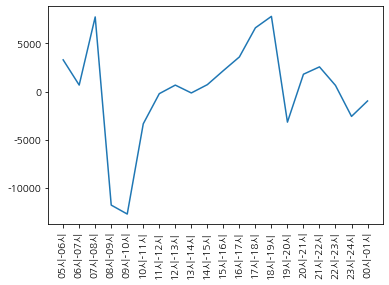

In [ ]:
# 전체적인 추세 파악을 위한 그래프
timezone=list(sum_dict.keys())
num_of_get_on_minus_get_off=list(sum_dict.values())

plt.figure()
plt.xticks(rotation=90)
plt.plot(timezone, num_of_get_on_minus_get_off)

Text(18시-19시, 7794, '7794(최대값)')

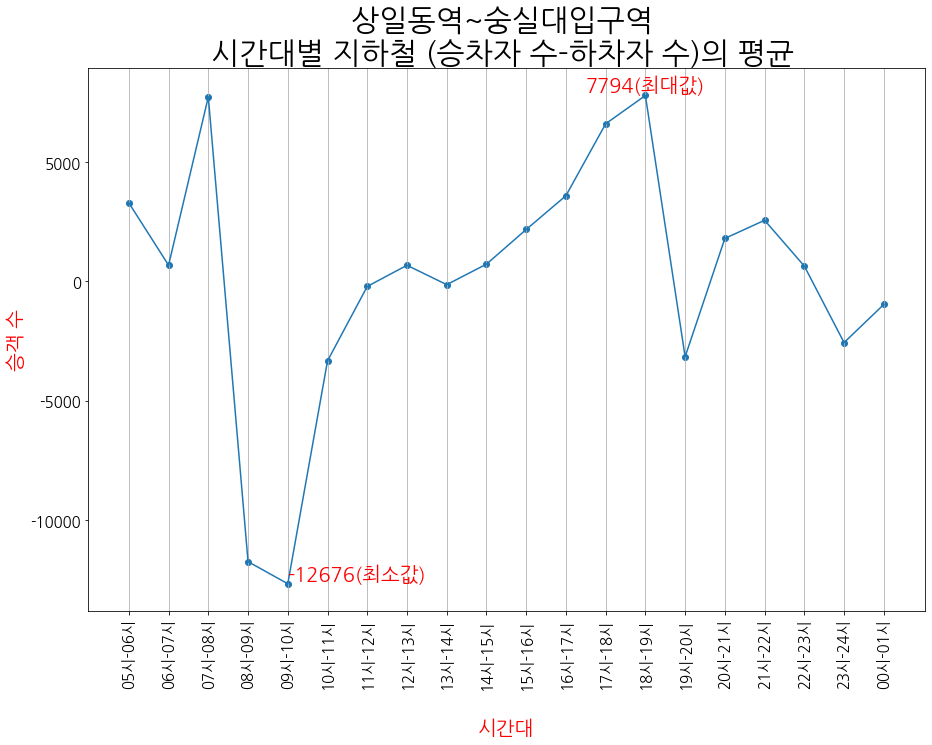

In [ ]:
# 시각화
import matplotlib.pyplot as plt
plt.rcParams['font.family']=['NanumGothic','sans-serif']
plt.rcParams['axes.unicode_minus'] = False

# 그래프 그리는 코드
plt.figure(figsize=(15,10))
plt.title('''상일동역~숭실대입구역 
시간대별 지하철 (승차자 수-하차자 수)의 평균 ''',fontsize=30)
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True,axis='x')
plt.plot(timezone, num_of_get_on_minus_get_off)
plt.xlabel('시간대',fontsize=20, labelpad=30, color='r')
plt.ylabel('승객 수',fontsize=20, color='r')
plt.scatter(timezone,num_of_get_on_minus_get_off)

# 그래프에 텍스트를 나타내기 위해 기존의 딕셔너리 key,value값을 서로 맞바꾼다.
sum_graph=dict(zip(sum_dict.values(),sum_dict.keys()))

# 최솟값 표시
plt.text(sum_graph[int(min(num_of_get_on_minus_get_off))], 
         int(min(num_of_get_on_minus_get_off)),
         str(int(min(num_of_get_on_minus_get_off)))+'(최소값)',
         color='r',
         verticalalignment='bottom',
         fontsize=20)

# 최댓값 표시
plt.text(sum_graph[int(max(num_of_get_on_minus_get_off))], 
         int(max(num_of_get_on_minus_get_off)),
         str(int(max(num_of_get_on_minus_get_off)))+'(최대값)',
         color='r',
         horizontalalignment='center',
         verticalalignment='bottom',
         fontsize=20)

In [ ]:
from matplotlib import pyplot as plt
import itertools

# 누적합 (0번 인덱스 값 : 오전 05시-오전06시, 마지막 인덱스 값 : 오전 00시-오전01시)
result = list(itertools.accumulate(sum_dict.values()))
result

[3291,
 3970,
 11705,
 -45,
 -12721,
 -16053,
 -16264,
 -15588,
 -15724,
 -15001,
 -12825,
 -9233,
 -2625,
 5169,
 2011,
 3813,
 6376,
 7018,
 4453,
 3486]

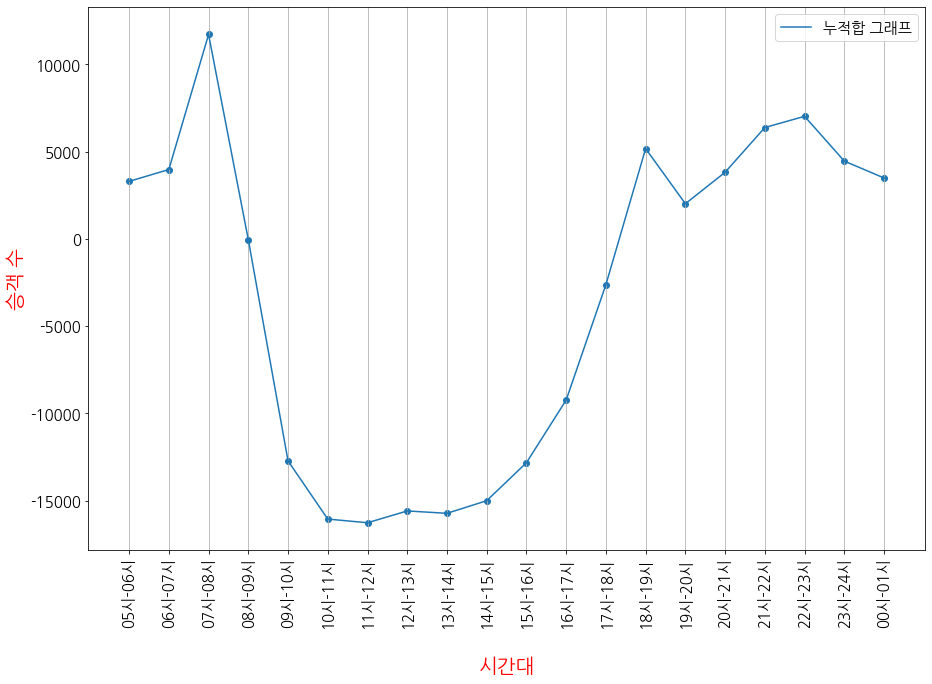

In [ ]:
# 그래프 그리는 코드
%matplotlib inline
from matplotlib import pyplot as plt
plt.figure(figsize=(15,10))
plt.xticks(rotation=90, fontsize=15)
plt.yticks(fontsize=15)
plt.grid(True,axis='x')
plt.plot(timezone,result, label='누적합 그래프')
plt.scatter(timezone,result)
plt.xlabel('시간대',fontsize=20, labelpad=30, color='r')
plt.ylabel('승객 수',fontsize=20, color='r')
plt.legend(fontsize=15)

# 추가

In [ ]:
# 데이터 수집
import pandas as pd
from google.colab import drive
drive.mount('/content/gdrive', force_remount=True)

df_plus = pd.read_csv('/content/gdrive/My Drive/data_analysis/data/seoul-metro-complexity-data/서울교통공사_혼잡도_20191231.csv',encoding='cp949')
df_plus

Mounted at /content/gdrive


,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,10시30분,11시00분,11시30분,12시00분,12시30분,13시00분,13시30분,14시00분,14시30분,15시00분,15시30분,16시00분,16시30분,17시00분,17시30분,18시00분,18시30분,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,24시00분,24시30분
0,평일,1호선,150,서울역,상선,8.2,12.9,21.5,28.4,46.7,70,74.5,52.2,57.1,38.5,31.3,45.9,36.5,34.9,36,35,35.2,31.6,29.6,28.7,26,27.5,32.7,26.8,34.4,40.3,42.7,29.8,21.7,15.1,15.9,17.1,16,19,15.2,10.5,7.8,6,0.9
1,평일,1호선,150,서울역,하선,11.8,13.5,12.2,17.8,26.4,34.8,25.2,21,17,16.4,20.8,20.4,24.9,27.8,28.5,30.8,34.3,36,30,49,43.7,46.4,57,65.7,70.4,105.6,76.5,51,37.4,36.5,31.2,37.6,44.6,45.6,37.8,28.8,19.3,7.1,0.4
2,평일,1호선,151,시청,상선,7.7,11.2,19.6,24.4,36.2,53.7,51.7,47.1,47.1,37.4,27.2,41.1,38,34.5,34.8,35.3,33.7,32.4,30.4,30.3,28.3,29.7,34.2,30.8,35.6,51.1,48.7,36.1,24.2,18.7,18.3,20.7,22,24,18.7,13.7,10,6.9,1.0
3,평일,1호선,151,시청,하선,9.5,11.3,11.6,16.7,23.2,34.1,26.4,21,16.8,16.4,19.6,19.9,23.5,26.2,28,29.8,32.6,35.5,35.4,41,41.9,44.3,52.4,60.9,64.1,88.8,73.4,48.1,34.1,32,27.7,34.8,39.3,37.4,36.3,23,18.1,4,1.6
4,평일,1호선,152,종각,상선,6.3,8.1,15.5,16.6,22.7,34.8,28.7,32.4,35,30.6,24.4,36.7,38.5,27.6,32.9,34.1,32.7,33.2,30.4,36.3,30.7,30.4,35.4,37.3,39.2,65.5,58.2,42.1,30.1,25.8,24.2,30,31.9,34,26.8,18.8,12.5,9.1,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1663,일요일,8호선,2825,신흥,하선,6.9,3.4,4,2.8,6.3,5.4,6,8.2,9.3,10.5,10.5,12.5,10.7,9.6,9.2,10.3,11.8,9.5,8.9,7.9,7.2,7.5,6.7,6.3,5.2,5.6,5.5,4.7,3.9,3.5,3,3.1,3.5,2.9,2.3,2.1,1.7,NaN,NaN
1664,일요일,8호선,2826,수진,상선,2.4,2.2,2.2,2.2,2.5,3.3,4.1,5.6,7.1,5.7,6.3,5.5,6,8.2,8.8,10.5,12.4,13.8,10.3,8.7,10.7,9.9,11,9,10.6,6.7,9.1,6,6.6,4.6,6.4,5.9,4.8,5.5,4.4,3.4,1.5,NaN,NaN
1665,일요일,8호선,2826,수진,하선,11,3.7,3.2,2.6,4.1,5.5,5.8,7.6,9.4,10,9.5,10.4,10,11.1,10,9.4,11.9,8.8,8.2,7.4,7.4,7.4,7.6,6,5.2,5,3.1,3,2.5,2.8,2.3,1.9,1.4,1.3,1.4,1,0.4,NaN,NaN
1666,일요일,8호선,2827,모란,상선,1.8,2,1.7,1.7,1.8,2.1,3.1,3.2,5,4,5.3,4,4.7,6.7,7.2,9.4,10.3,13.1,9.6,8.3,9.4,9.9,10.5,8.3,10.1,5.9,9.4,6.3,6.4,4.5,5.1,5.9,5.3,5.7,4.2,3.4,1.5,NaN,NaN


In [ ]:
# 전체 데이터의 구조 파악
df_plus.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1668 entries, 0 to 1667
Data columns (total 44 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   조사일자    1668 non-null   object 
 1   호선      1668 non-null   object 
 2   역번호     1668 non-null   int64  
 3   역명      1668 non-null   object 
 4   구분      1668 non-null   object 
 5   5시30분   1668 non-null   object 
 6   6시00분   1668 non-null   object 
 7   6시30분   1668 non-null   object 
 8   7시00분   1668 non-null   object 
 9   7시30분   1668 non-null   object 
 10  8시00분   1668 non-null   object 
 11  8시30분   1668 non-null   object 
 12  9시00분   1668 non-null   object 
 13  9시30분   1668 non-null   object 
 14  10시00분  1668 non-null   object 
 15  10시30분  1668 non-null   object 
 16  11시00분  1668 non-null   object 
 17  11시30분  1668 non-null   object 
 18  12시00분  1668 non-null   object 
 19  12시30분  1668 non-null   object 
 20  13시00분  1668 non-null   object 
 21  13시30분  1668 non-null   object 
 22  

In [ ]:
# 실제 이동 경로에 해당되는 역만 추출
  
station = ['상일동','고덕','명일','굽은다리','길동','강동','천호','광나루','아차산','군자',
           '어린이대공원','건대입구','뚝섬유원지','청담','강남구청','학동','논현','반포','고속터미널','내방','총신대입구','남성','숭실대입구']
df_plus = df_plus[df_plus['역명'].isin(station)]

# 평일만 포함시킨다.
saturday = df_plus[(df_plus['조사일자']=='토요일')].index
sunday = df_plus[(df_plus['조사일자']=='일요일')].index
df_plus = df_plus.drop(saturday)
df_plus = df_plus.drop(sunday)

# 단, 2개 이상 호선이 겹치는 역의 경우, 실제 이동경로가 아닌 호선의 경우 제거해야한다.

cheonho = df_plus[(df_plus['역번호']==2812)].index
df_plus = df_plus.drop(cheonho)

konkuk = df_plus[(df_plus['역번호']==212)].index
df_plus=df_plus.drop(konkuk)

express_bus_terminal_3 = df_plus[(df_plus['역번호']==329)].index
df_plus = df_plus.drop(express_bus_terminal_3)

chong_sin = df_plus[(df_plus['역번호']==432)].index
df_plus = df_plus.drop(chong_sin)

df_plus
# df_plus.to_excel("df_f3.xlsx")

,조사일자,호선,역번호,역명,구분,5시30분,6시00분,6시30분,7시00분,7시30분,8시00분,8시30분,9시00분,9시30분,10시00분,10시30분,11시00분,11시30분,12시00분,12시30분,13시00분,13시30분,14시00분,14시30분,15시00분,15시30분,16시00분,16시30분,17시00분,17시30분,18시00분,18시30분,19시00분,19시30분,20시00분,20시30분,21시00분,21시30분,22시00분,22시30분,23시00분,23시30분,24시00분,24시30분
310,평일,5호선,2545,군자,상선,22.1,21,30.4,47.8,61.1,80.6,62.5,64.6,54.4,41.2,35.9,35.6,30.6,32.6,31.1,34.3,28.9,28.3,25.9,27.4,26,29.9,34.4,40.7,30.4,32.8,32.3,30.8,26,20.7,18.5,20,20.3,21.3,18.5,17.5,14.9,6.6,4.6
311,평일,5호선,2545,군자,하선,19.7,42,29.6,32.6,53.9,59.8,28.9,22.1,29,24.2,27.4,25,25.7,28.6,27.7,31.7,33.3,34.7,32,38.5,41.4,45.9,55.6,62.6,78.9,78.3,85.8,61,46.8,48.6,52.6,47.5,51.4,56.6,53.5,41.9,31.9,19.4,7.7
312,평일,5호선,2546,아차산,상선,27.8,24.1,33.5,53.1,63.3,87.5,67.2,73.6,64.5,48.1,41.3,40.8,35.8,38.9,37.5,38.8,33.8,32.4,31.3,32.5,33.8,38.3,43.2,52.9,41.3,45.6,47.8,43.4,35.4,29,25.5,28.8,26.6,28.8,25.5,23.1,14.4,10.2,4.8
313,평일,5호선,2546,아차산,하선,22.6,49,27,36.9,48.2,63.7,30.8,21.5,28,23.2,26.7,23.7,24.8,26.6,28.1,29.7,31.6,31.2,32.4,35.6,39,42.1,53.6,57,72.2,75.9,75.6,60,42.7,45.5,45.9,46.3,48.1,50.9,48.6,40.1,30.1,17.2,20.1
314,평일,5호선,2547,광나루,상선,24.2,21.8,31,46.6,62.3,82,62.4,67.9,60.9,45.4,38.9,38.7,33.8,37,35,36.9,31.7,30,29.4,31,31.6,36.5,42,51.7,40.9,46.6,46.1,45.5,36,29.4,25.8,28.9,26.4,28.5,25.2,23.4,14.6,9,3.7
315,평일,5호선,2547,광나루,하선,23.5,48.5,27.2,38.2,48.2,61.7,35.1,21.1,27.9,23.2,25.7,23.1,24.1,26.5,27,29.2,30.7,30.5,31.3,34.6,37.8,40.9,51.9,55,69.4,72.4,71,59.1,44.1,39.9,42.8,43.9,45,47.6,45.1,37.1,27.8,16.3,18.4
316,평일,5호선,2548,천호,상선,20.7,22.3,30.6,44.2,59.8,76.8,58.2,64.9,51.6,41.5,36.9,36.5,32.1,34.9,33,35,29.9,28.8,27.6,30.1,30,36.4,40.5,52.2,37.2,45.3,45,43.3,34.5,27.9,25.2,28.8,25.2,27.7,23,26.4,14.8,9.3,3.9
317,평일,5호선,2548,천호,하선,18.9,40,21.9,21.3,32.8,41.3,22.9,13,17.2,16,18.7,19,18.9,19.3,22.4,25,24.9,26,28.4,28,31.8,36.9,41,50.8,53.7,66.5,62.7,53.2,37.5,35.1,40.8,37.4,41.8,41.7,44,33.2,24.2,11.9,16.7
318,평일,5호선,2549,강동,상선,16.9,21.3,30.6,40.3,59.4,70,58.7,62.5,44.6,40.9,30.1,34.9,26.4,33.6,26.9,33.2,25,28,22.6,28,23.9,33.7,32.1,46.9,30.8,34.6,33.1,28.5,21.1,18.8,15.4,18,16.4,19.6,15.5,16,10.3,3,2.6
319,평일,5호선,2549,강동,하선,2.6,6.1,10.3,5.3,7.7,18.7,7.5,6,8.9,8.2,8.2,12.5,9.2,12.4,10,16.8,11.9,16.4,15.3,18,16.1,24.8,21.3,22.8,18,35.2,38.7,38.6,18.8,24.4,28.9,19.7,27.4,19.8,27,21,16.2,9.7,8.9


In [ ]:
df_plus.shape[0]

48

In [ ]:
# 혼잡도 평균
# 딕셔너리 자료형 활용

sum_plus_dict={}
# 전체 행의 개수 (각 시간대별 값을 전체 행의 개수로 나누기 위함)
num_of_rows=int(df_plus.shape[0])

for i in range(5,24+1):
  zero=0
  three=3
  if i== 5:
    df_plus[f'{i}시{three}0분'] = df_plus[f'{i}시{three}0분'].astype('float')
    sum_plus_dict[f'{i}시 {three}0분 합계 평균']=int(df_plus[f'{i}시{three}0분'].sum() / num_of_rows)
    continue
  df_plus[f'{i}시{zero}0분'] = df_plus[f'{i}시{zero}0분'].astype('float')
  sum_plus_dict[f'{i}시 {zero}0분 합계 평균']=int(df_plus[f'{i}시{zero}0분'].sum() / num_of_rows)

  df_plus[f'{i}시{three}0분'] = df_plus[f'{i}시{three}0분'].astype('float')
  sum_plus_dict[f'{i}시 {three}0분 합계 평균']=int(df_plus[f'{i}시{three}0분'].sum() / num_of_rows)


print(sum_plus_dict)

{'5시 30분 합계 평균': 23, '6시 00분 합계 평균': 30, '6시 30분 합계 평균': 29, '7시 00분 합계 평균': 37, '7시 30분 합계 평균': 50, '8시 00분 합계 평균': 62, '8시 30분 합계 평균': 48, '9시 00분 합계 평균': 44, '9시 30분 합계 평균': 39, '10시 00분 합계 평균': 34, '10시 30분 합계 평균': 29, '11시 00분 합계 평균': 28, '11시 30분 합계 평균': 26, '12시 00분 합계 평균': 27, '12시 30분 합계 평균': 28, '13시 00분 합계 평균': 30, '13시 30분 합계 평균': 28, '14시 00분 합계 평균': 27, '14시 30분 합계 평균': 29, '15시 00분 합계 평균': 31, '15시 30분 합계 평균': 32, '16시 00분 합계 평균': 36, '16시 30분 합계 평균': 43, '17시 00분 합계 평균': 50, '17시 30분 합계 평균': 50, '18시 00분 합계 평균': 55, '18시 30분 합계 평균': 59, '19시 00분 합계 평균': 45, '19시 30분 합계 평균': 37, '20시 00분 합계 평균': 36, '20시 30분 합계 평균': 35, '21시 00분 합계 평균': 36, '21시 30분 합계 평균': 34, '22시 00분 합계 평균': 36, '22시 30분 합계 평균': 33, '23시 00분 합계 평균': 28, '23시 30분 합계 평균': 21, '24시 00분 합계 평균': 13, '24시 30분 합계 평균': 8}


In [ ]:
# 데이터 시각화 위해 import
%matplotlib inline
import matplotlib.pyplot as plt

# 한글 폰트 적용
plt.rcParams['font.family']=['NanumGothic','sans-serif']
plt.rcParams['axes.unicode_minus'] = False

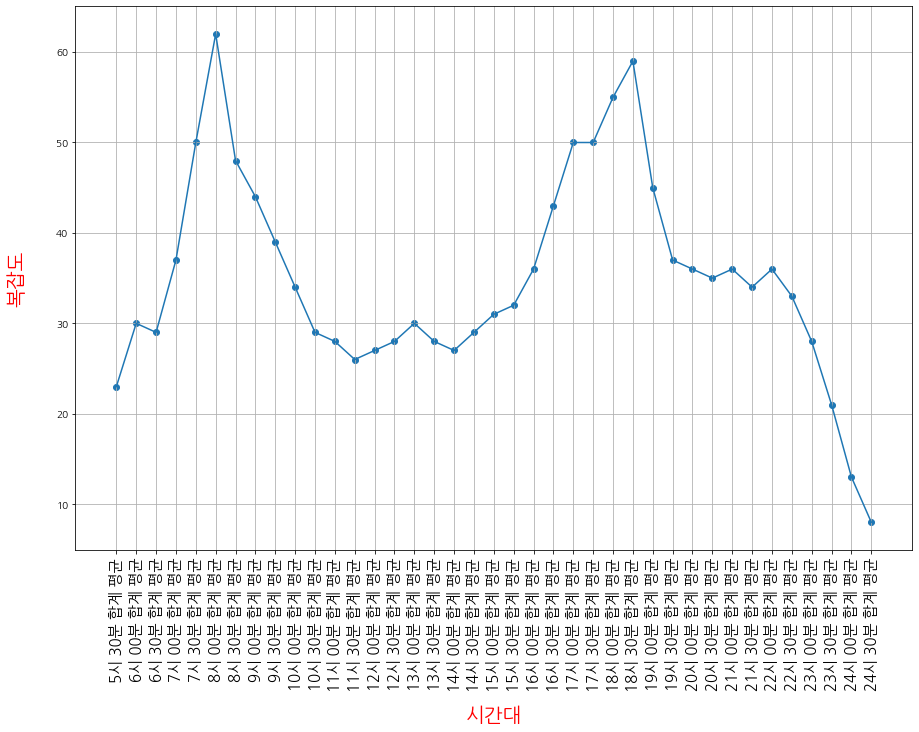

In [ ]:
# 그래프 그리는 코드
timezone_complexity=list(sum_plus_dict.keys())
complexity_percentage=list(sum_plus_dict.values())

plt.figure(figsize=(15,10))
plt.xticks(rotation=90,fontsize=15)
plt.grid(True,axis='x')
plt.grid(True,axis='y')
plt.xlabel('시간대',fontsize=20, color='r', labelpad=15)
plt.ylabel('복잡도',fontsize=20, color='r', labelpad=30)

plt.plot(timezone_complexity, complexity_percentage)
plt.scatter(timezone_complexity, complexity_percentage)

18 39
result: [3291, 3970, 11705, -45, -12721, -16053, -16264, -15588, -15724, -15001, -12825, -9233, -2625, 5169, 2011, 3813, 6376, 7018]
len(result): 18
[23, 30, 29, 37, 50, 62, 48, 44, 39, 34, 29, 28, 26, 27, 28, 30, 28, 27, 29, 31, 32, 36, 43, 50, 50, 55, 59, 45, 37, 36, 35, 36, 34, 36, 33, 28, 21, 13, 8]
[30, 37, 62, 44, 34, 28, 27, 30, 27, 31, 36, 50, 55, 45, 36, 36, 36, 28, 13]
[23, 29, 50, 48, 39, 29, 26, 28, 28, 29, 32, 43, 50, 59, 37, 35, 34, 33, 21]
mean : [26.5, 33.0, 56.0, 46.0, 36.5, 28.5, 26.5, 29.0, 27.5, 30.0, 34.0, 46.5, 52.5, 52.0, 36.5, 35.5, 35.0, 30.5, 17.0]
18 18


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


(상관계수, p-value) : (0.4777126309213842, 0.044963149310342405)


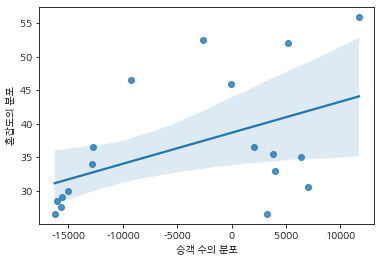

In [ ]:
# 상관관계 분석 참고 링크
# https://mindscale.kr/course/basic-stat-python/6/
# https://ordo.tistory.com/100
# https://angeloyeo.github.io/2020/03/29/p_value.html
import numpy as np

# 두 리스트의 길이가 달라서 상관계수 분석을 위해서는 두 리스트의 길이를 맞추는 것이 필요. (result:20,list(sum_plus_dict.values()):39)
# list(sum_plus_dict_values())의 값은 30분 간격이므로 이를 1시간 간격으로 맞추기 위해 x시 00분과 x시 30분의 값을 더한 후 평균(mean)을 구한다.
# 따라서 두 리스트에서 제일 마지막 값을 하나씩 제거하기로 한다.(19:38)
print(len(result), len(list(sum_plus_dict.values())))

sum_plus_on_time_idx=list()
sum_plus_thirty_idx=list()

# 반복문을 실행해가며 list(sum_plus_dict.values())를 정각과 30분단위의 두개로 나눠준다.
for i in range(len(list(sum_plus_dict.values()))):
  if i==0: 
    sum_plus_thirty_idx.append(list(sum_plus_dict.values())[i])
    continue
  if i % 2 == 0 and i != 0:
   sum_plus_thirty_idx.append(list(sum_plus_dict.values())[i])
  elif i%2 ==1 and i!=0:
    sum_plus_on_time_idx.append(list(sum_plus_dict.values())[i])

# 제일 마지막에 있는 값을 하나씩 빼자, 단 실행할때마다 값이 하나씩 없어지니 특정 값으로 지워보자.
sum_plus_thirty_idx.remove(8)

print('result:',result)
print('len(result):', len(result))
print(list(sum_plus_dict.values()))

print(sum_plus_on_time_idx) 
print(sum_plus_thirty_idx)

# sum_plus_on_time의 값은 정각의 값만 들어와있고, sum_plus_thirty_idx값은
# 30분의 값만 들어와 있으므로
# 이를 1시간 간격으로 맞추기 위해 x시 00분과 x시 30분의 값을 더한 후 평균(mean)을 구한다.
# 이렇게하면 간격의 조정이 된다. (result는 05시-06시부터 시작, mean은 5시30분+06시00분이 합쳐진 값부터 시작)
mean=list()
for j in range(len(sum_plus_on_time_idx)):
  var1 = sum_plus_on_time_idx[j]
  var2 = sum_plus_thirty_idx[j]
  var3 = (var1 + var2)/2
  mean.append(var3)
  var3=0
print('mean :',mean)


# 23시-24시에 이동하지는 않을 것이므로 이를 제거한다.
mean.remove(17.0)
result.remove(3486)

print(len(result),len(mean))

import seaborn as sns
plot = sns.regplot(result,mean)
plot.set(xlabel='승객 수의 분포', ylabel='혼잡도의 분포')

# 출력값 : 상관계수, p-value : 0.05보다 작으면 귀무가설을 기각하고 대립가설을 채택한다.
# 피어슨 상관계수에 따르면 0.46의 값은 뚜렷한 양적 선형관계를 가진다.
# p-value는 0.05보다 작은 0.049를 보이므로 귀무가설(상관관계가 없다)를 기각하고 대립가설(상관관계가 있다)을 채택한다.
import scipy.stats as stats
print('(상관계수, p-value) :',stats.pearsonr(result,mean))